# The Importance of a Zero Determinant

A zero determinant is a critical red flag in linear algebra. It tells us that a matrix is **singular**, which has profound consequences for both geometric transformations and solving systems of linear equations. Let's explore why.

--- 
## 📐 Part 1: Matrix Transformations & Geometry

In the context of geometric transformations, the **determinant** of a matrix represents the **scaling factor of area (in 2D) or volume (in 3D)**.

- **Non-Zero Determinant:** The transformation scales, rotates, or shears the space, but it is **invertible**. You can always reverse the transformation to get back to where you started. The area/volume changes by a factor equal to the determinant.

- **Zero Determinant:** The scaling factor is zero. This means the transformation **collapses the space into a lower dimension**. For example, a 2D plane is squashed onto a single line. This process is **irreversible** because information is lost. A matrix with a determinant of 0 does not have an inverse.

### Visualization with Python
Let's visualize this. First, we'll set up our plotting tools and a shape to transform (a simple unit square).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertices of a unit square
square = np.array([
    [0, 0, 1, 1, 0],  # x-coordinates
    [0, 1, 1, 0, 0]   # y-coordinates
])

# A helper function to plot the original and transformed shapes
def plot_transformation(A, shape=square):
    transformed_shape = A @ shape
    
    plt.figure(figsize=(6, 6))
    # Plot the original square
    plt.plot(shape[0, :], shape[1, :], 'b--', label='Original Square')
    # Plot the transformed shape
    plt.plot(transformed_shape[0, :], transformed_shape[1, :], 'r-', label='Transformed Shape')
    
    det = np.linalg.det(A)
    plt.title(f'Transformation with Determinant = {det:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

#### Case 1: Non-Zero Determinant (Invertible Transformation)

The determinant is: 3.0000000000000004


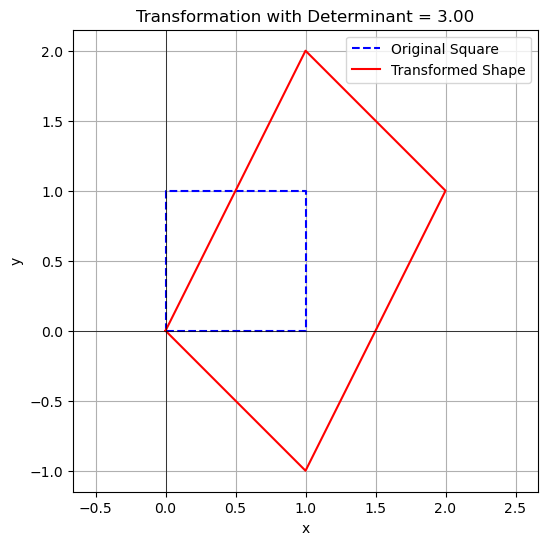

In [4]:
# Define an invertible matrix (e.g., rotation and scaling)
A_invertible = np.array([
    [1, 1],
    [-1, 2]
])

print(f"The determinant is: {np.linalg.det(A_invertible)}")
plot_transformation(A_invertible)

As you can see, the square is transformed into a parallelogram, but it still occupies a 2D area. The new area is 3 times the original area, just as the determinant predicted!

#### Case 2: Zero Determinant (Singular Transformation)

The determinant is: 0.0


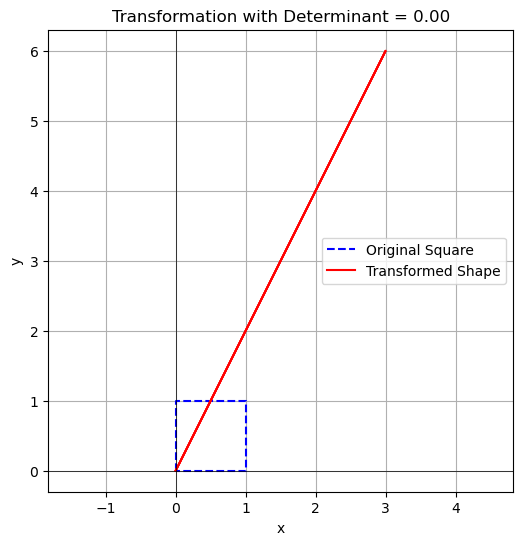

In [5]:
# Define a singular matrix
A_singular = np.array([
    [2, 1],
    [4, 2]  # This row is 2x the first row, making the matrix singular
])

print(f"The determinant is: {np.linalg.det(A_singular)}")
plot_transformation(A_singular)

Notice how the entire 2D square has been **squashed** onto a single 1D line. The area of the resulting shape is zero, exactly as the determinant predicted. You can't reverse this process to get the original square back.

---
## 📝 Part 2: Solving Simultaneous Linear Equations

A system of linear equations can be written in the matrix form $Ax = b$. To find a unique solution, we often want to find the inverse of $A$ and calculate $x = A^{-1}b$.

- **Non-Zero Determinant**: If `det(A) ≠ 0`, the inverse $A^{-1}$ exists. This guarantees that the system has **exactly one unique solution**.

- **Zero Determinant**: If `det(A) = 0`, the matrix $A$ has no inverse. This means the system will have either:
    1.  **No Solutions** (inconsistent system, e.g., parallel lines).
    2.  **Infinitely Many Solutions** (dependent system, e.g., coincident lines).

#### Case 1: Non-Zero Determinant (Unique Solution)

In [6]:
# System: 
# 2x + 1y = 4
# 3x - 2y = -1

A = np.array([
    [2, 1],
    [3, -2]
])

b = np.array([4, -1])

# Check determinant
det_A = np.linalg.det(A)
print(f"Determinant of A: {det_A}")

if det_A != 0:
    print("\nMatrix is non-singular. A unique solution exists.")
    x = np.linalg.solve(A, b)
    print(f"Solution is x = {x[0]}, y = {x[1]}")
else:
    print("\nMatrix is singular. No unique solution.")

Determinant of A: -6.999999999999999

Matrix is non-singular. A unique solution exists.
Solution is x = 1.0000000000000002, y = 2.0000000000000004


#### Case 2: Zero Determinant (No Unique Solution)

In [7]:
# System:
# 2x + 1y = 4
# 4x + 2y = 8  (This is just the first equation multiplied by 2)

A = np.array([
    [2, 1],
    [4, 2]
])

b = np.array([4, 8])

# Check determinant
det_A = np.linalg.det(A)
print(f"Determinant of A: {det_A}")

if det_A != 0:
    x = np.linalg.solve(A, b)
    print(f"Solution is x = {x[0]}, y = {x[1]}")
else:
    print("\nMatrix is singular. No unique solution.")
    print("Attempting to solve will raise an error:")
    try:
        np.linalg.solve(A, b)
    except np.linalg.LinAlgError as e:
        print(f"Error: {e}")
    print("\nThis system has infinitely many solutions (the lines are the same).")

Determinant of A: 0.0

Matrix is singular. No unique solution.
Attempting to solve will raise an error:
Error: Singular matrix

This system has infinitely many solutions (the lines are the same).


---
## Summary
Checking if the determinant is zero is a fundamental and powerful diagnostic tool in linear algebra.

- **Geometrically**, it tells you if a transformation is irreversible because it collapses space into a lower dimension.
- **Algebraically**, it tells you if a system of linear equations has a single, unique solution or if it behaves differently (having no or infinite solutions).